# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The time index of "pr" is not correct, thus we have additional function to resolve this issue

In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


def regrid_data_2006_pr(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        huss_ds = xr.open_dataset(CMIP_dir+mod+"/huss_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")["huss"]
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        temp_ds = temp_ds.assign_coords(time = huss_ds.indexes['time'])
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)    
    
    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)

    
def regrid_data_2061_pr(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        huss_ds = xr.open_dataset(CMIP_dir+mod+"/huss_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")["huss"]
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        temp_ds = temp_ds.assign_coords(time =  huss_ds.indexes['time'])
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)    
    
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    temp_var.append(regrid_data_2006_pr("pr", start_year, end_year, interval, height=False))
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))
    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    temp_var.append(regrid_data_2061_pr("pr", start_year, end_year, interval, height=False))
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))
    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "ACCESS1-3"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process pr******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/pr_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 4.02444052696228 to load the data
*********Start to merge*********
It takes elapsed_time 0.02824568748474121 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.09432554244995117 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.095869064331055 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.669935941696167 to mask the layer
*********Start to plot the layer*********


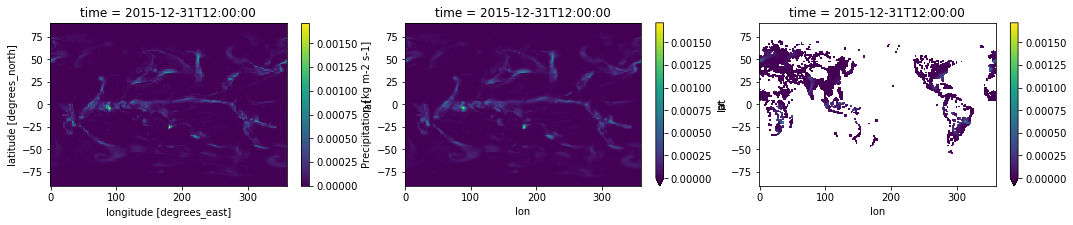

It takes elapsed_time 0.7592031955718994 to plot the layer
It takes elapsed_time 15.673375844955444 to deal with pr in total
******End pr******


******Start to process huss******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/huss_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.78171968460083 to load the data
*********Start to merge*********
It takes elapsed_time 0.04715442657470703 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028720855712890625 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.125767230987549 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6697523593902588 to mask the layer
*********Start to plot the layer*********


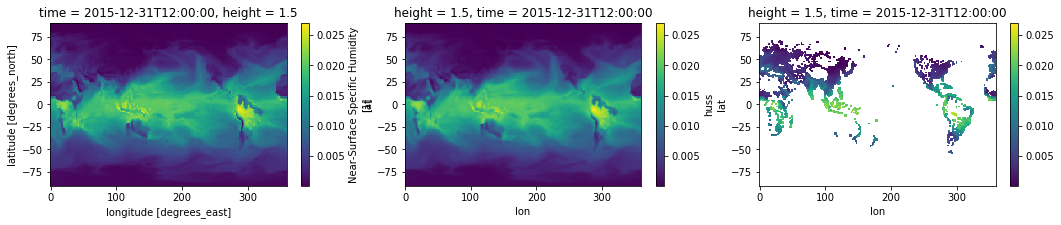

It takes elapsed_time 0.7568767070770264 to plot the layer
It takes elapsed_time 13.411861419677734 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/tas_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.007594347000122 to load the data
*********Start to merge*********
It takes elapsed_time 0.040064334869384766 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02962946891784668 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.114665985107422 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.689612627029419 to mask the layer
*********Start to plot the layer*********


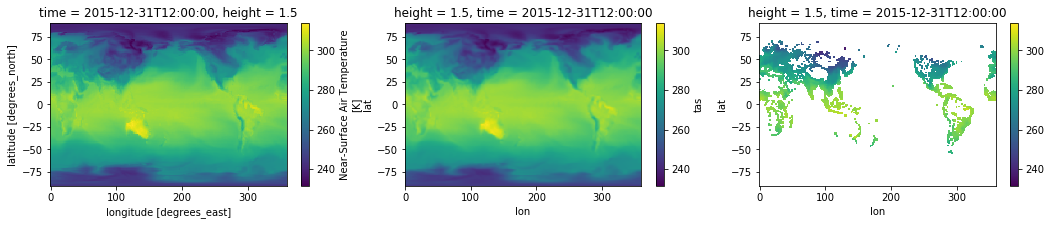

It takes elapsed_time 0.7337970733642578 to plot the layer
It takes elapsed_time 13.616891384124756 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/uas_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.059659004211426 to load the data
*********Start to merge*********
It takes elapsed_time 0.04004335403442383 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.06740236282348633 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.016815185546875 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6641061305999756 to mask the layer
*********Start to plot the layer*********


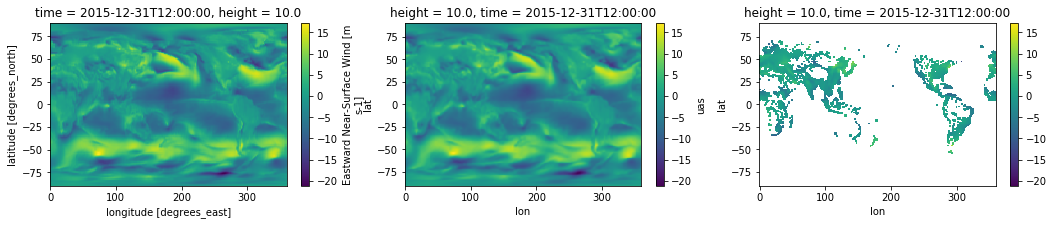

It takes elapsed_time 0.7438714504241943 to plot the layer
It takes elapsed_time 13.593629360198975 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/vas_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9381144046783447 to load the data
*********Start to merge*********
It takes elapsed_time 0.0421147346496582 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.028551101684570312 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.01517367362976 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6851706504821777 to mask the layer
*********Start to plot the layer*********


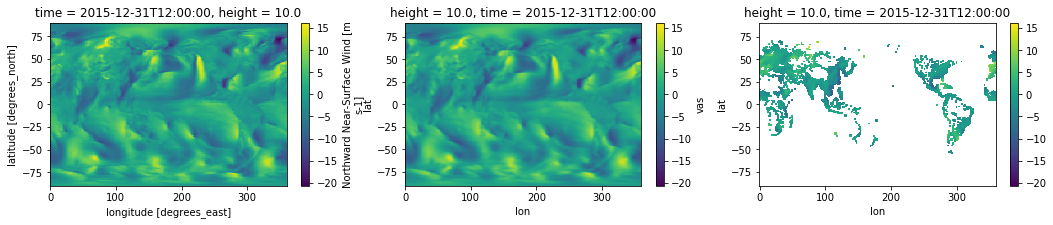

It takes elapsed_time 0.8003861904144287 to plot the layer
It takes elapsed_time 13.511132001876831 to deal with vas in total
******End vas******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/prsn_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.109618902206421 to load the data
*********Start to merge*********
It takes elapsed_time 0.03953695297241211 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08086419105529785 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.048654079437256 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6715748310089111 to mask the layer
*********Start to plot the layer*********


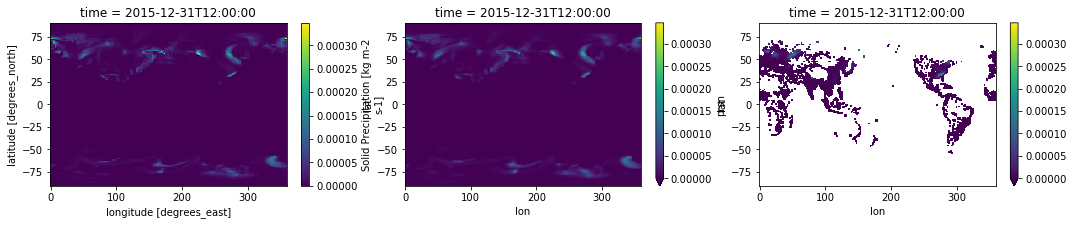

It takes elapsed_time 0.6868586540222168 to plot the layer
It takes elapsed_time 13.639345169067383 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rlds_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.0773308277130127 to load the data
*********Start to merge*********
It takes elapsed_time 0.04073739051818848 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.029485225677490234 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.07483696937561 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6813011169433594 to mask the layer
*********Start to plot the layer*********


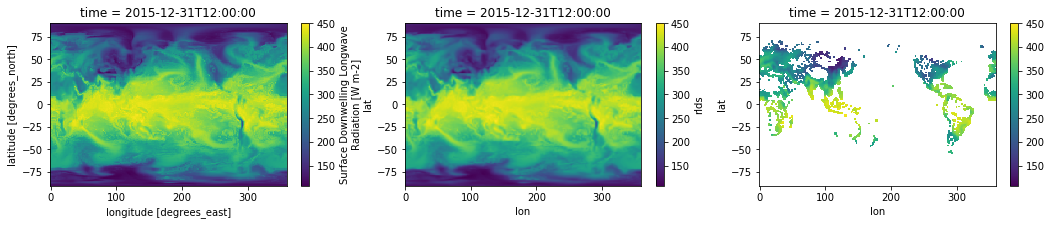

It takes elapsed_time 0.7440390586853027 to plot the layer
It takes elapsed_time 13.648773670196533 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rlus_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.8991022109985352 to load the data
*********Start to merge*********
It takes elapsed_time 0.040737152099609375 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02825140953063965 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.920435905456543 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6531798839569092 to mask the layer
*********Start to plot the layer*********


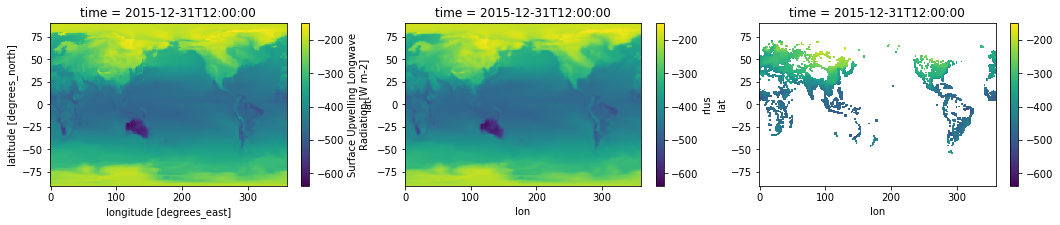

It takes elapsed_time 0.6789555549621582 to plot the layer
It takes elapsed_time 13.221594333648682 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rsds_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9346520900726318 to load the data
*********Start to merge*********
It takes elapsed_time 0.038159847259521484 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027863740921020508 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.932759284973145 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6657321453094482 to mask the layer
*********Start to plot the layer*********


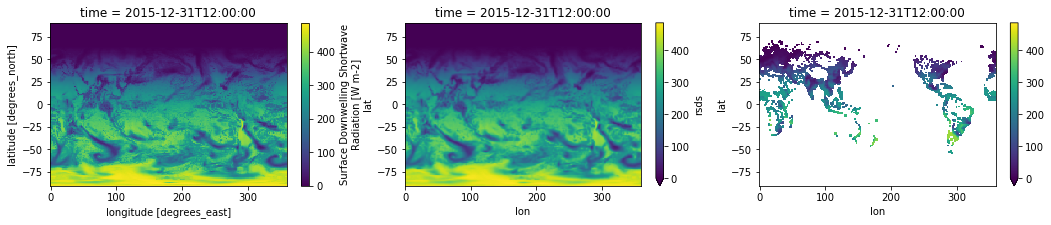

It takes elapsed_time 0.6824467182159424 to plot the layer
It takes elapsed_time 13.282360315322876 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rsus_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9955828189849854 to load the data
*********Start to merge*********
It takes elapsed_time 0.04036211967468262 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.06895685195922852 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.92470932006836 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6613302230834961 to mask the layer
*********Start to plot the layer*********


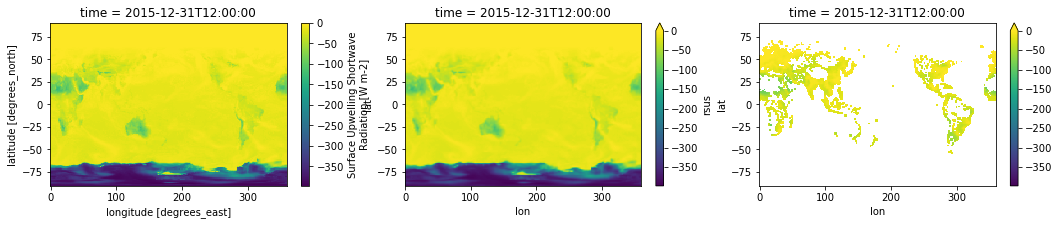

It takes elapsed_time 0.7034323215484619 to plot the layer
It takes elapsed_time 13.395109415054321 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2031, 25)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.77027702331543 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

235.182852268219


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process pr******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/pr_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 3.8687386512756348 to load the data
*********Start to merge*********
It takes elapsed_time 0.03671979904174805 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08594274520874023 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.901252269744873 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6523528099060059 to mask the layer
*********Start to plot the layer*********


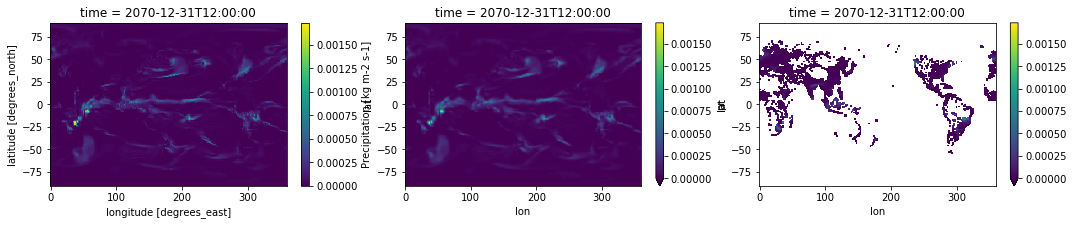

It takes elapsed_time 0.6792631149291992 to plot the layer
It takes elapsed_time 15.22507357597351 to deal with pr in total
******End pr******


******Start to process huss******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/huss_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.6283166408538818 to load the data
*********Start to merge*********
It takes elapsed_time 0.037834882736206055 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027868270874023438 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.915800094604492 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6538078784942627 to mask the layer
*********Start to plot the layer*********


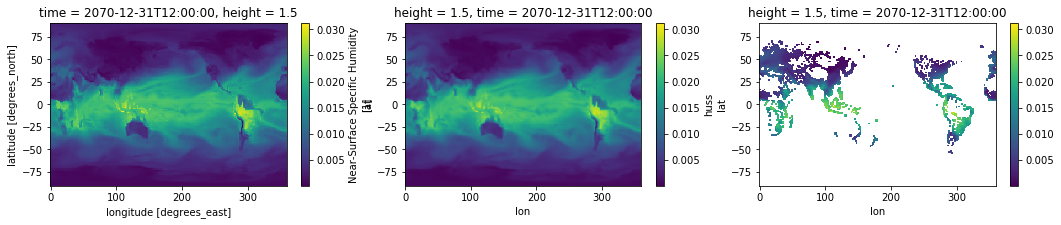

It takes elapsed_time 0.7015373706817627 to plot the layer
It takes elapsed_time 12.96644115447998 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/tas_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0069642066955566 to load the data
*********Start to merge*********
It takes elapsed_time 0.0379490852355957 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027573585510253906 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.909056425094604 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6603400707244873 to mask the layer
*********Start to plot the layer*********


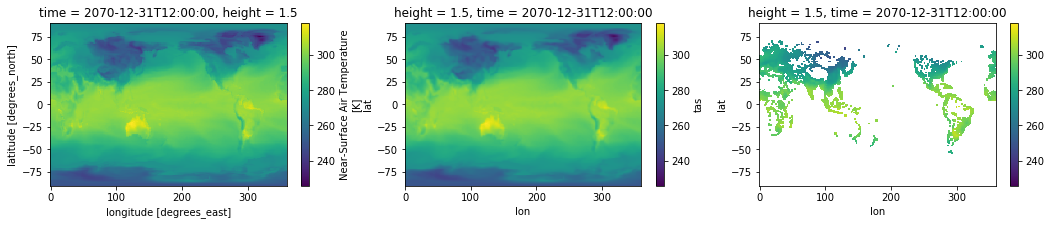

It takes elapsed_time 0.6817629337310791 to plot the layer
It takes elapsed_time 13.324389696121216 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/uas_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.815199613571167 to load the data
*********Start to merge*********
It takes elapsed_time 0.03886771202087402 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.10286808013916016 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.850442171096802 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6518030166625977 to mask the layer
*********Start to plot the layer*********


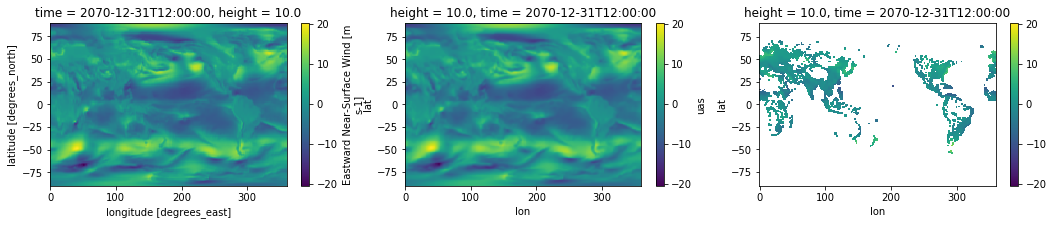

It takes elapsed_time 0.6973497867584229 to plot the layer
It takes elapsed_time 13.157490491867065 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/vas_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.1753573417663574 to load the data
*********Start to merge*********
It takes elapsed_time 0.039354562759399414 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.027760028839111328 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.852299928665161 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6547064781188965 to mask the layer
*********Start to plot the layer*********


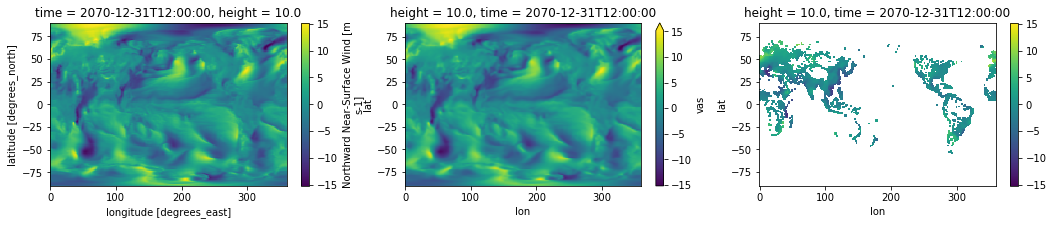

It takes elapsed_time 0.7186517715454102 to plot the layer
It takes elapsed_time 13.46907925605774 to deal with vas in total
******End vas******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/prsn_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9083678722381592 to load the data
*********Start to merge*********
It takes elapsed_time 0.03884315490722656 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.07494378089904785 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.937269449234009 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6610569953918457 to mask the layer
*********Start to plot the layer*********


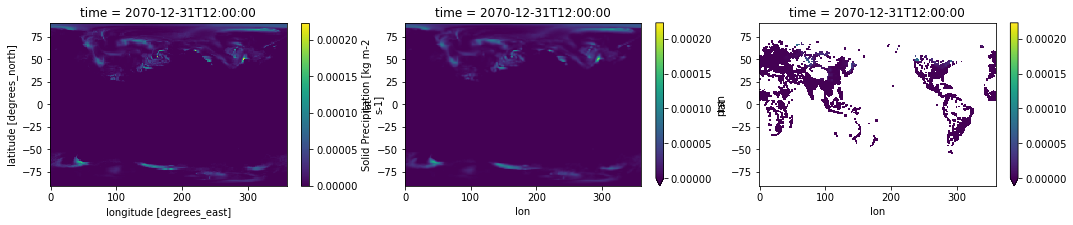

It takes elapsed_time 0.647320032119751 to plot the layer
It takes elapsed_time 13.26877236366272 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rlds_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9137351512908936 to load the data
*********Start to merge*********
It takes elapsed_time 0.03996753692626953 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.04902005195617676 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.906873941421509 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6519548892974854 to mask the layer
*********Start to plot the layer*********


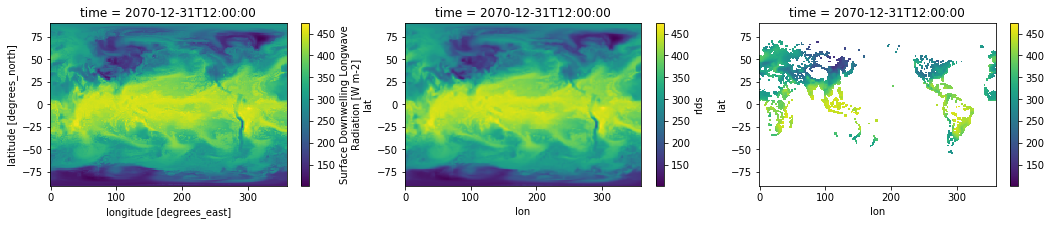

It takes elapsed_time 0.7129271030426025 to plot the layer
It takes elapsed_time 13.275211811065674 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rlus_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0782041549682617 to load the data
*********Start to merge*********
It takes elapsed_time 0.037821292877197266 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027876615524291992 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.897180080413818 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6543397903442383 to mask the layer
*********Start to plot the layer*********


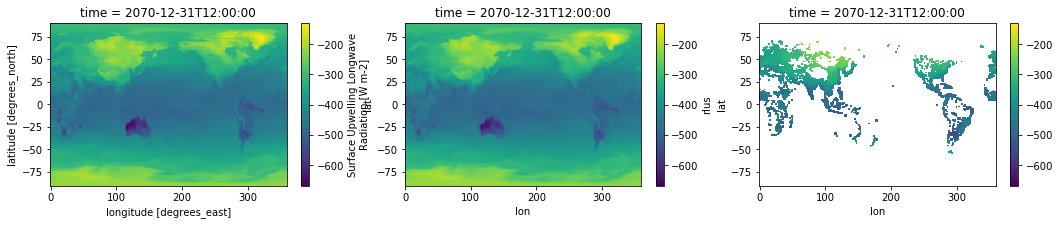

It takes elapsed_time 0.6722650527954102 to plot the layer
It takes elapsed_time 13.368419170379639 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rsds_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9409513473510742 to load the data
*********Start to merge*********
It takes elapsed_time 0.03776288032531738 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.060982465744018555 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.908784866333008 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6546361446380615 to mask the layer
*********Start to plot the layer*********


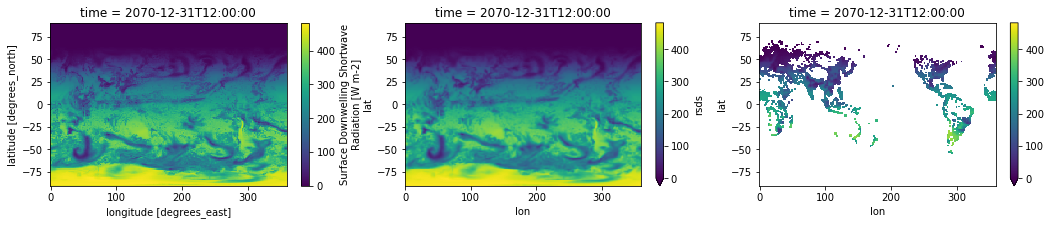

It takes elapsed_time 0.6797442436218262 to plot the layer
It takes elapsed_time 13.284433126449585 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-3/rsus_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.901167631149292 to load the data
*********Start to merge*********
It takes elapsed_time 0.040990591049194336 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.027559995651245117 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.888697624206543 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6518881320953369 to mask the layer
*********Start to plot the layer*********


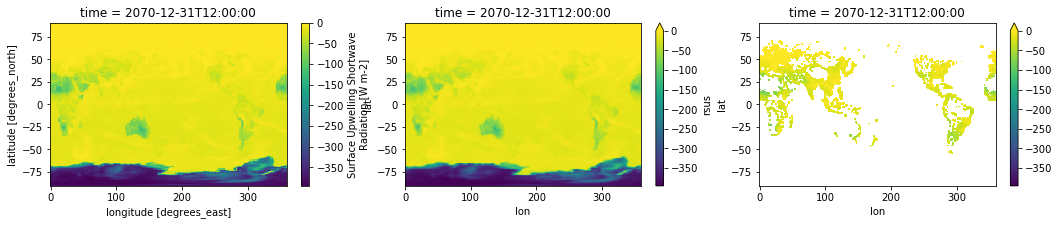

It takes elapsed_time 0.6984224319458008 to plot the layer
It takes elapsed_time 13.209699869155884 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2056, 2081, 25)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 28.688291311264038 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

232.62303924560547
